<a href="https://colab.research.google.com/github/salarbalou/Data_Analysis_Projects/blob/main/Solvent-Engineering-Via-Hansen3DSpace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

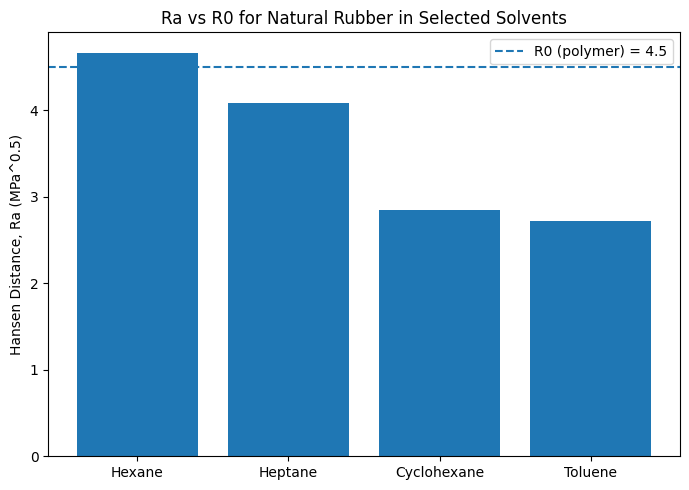

In [ ]:
import math
import matplotlib.pyplot as plt

# --- Hansen parameters (MPa^0.5) ---
polymer = {"name": "Natural Rubber", "dd": 16.7, "dp": 2.2, "dh": 2.0}

solvents = [
    {"name": "Hexane", "dd": 14.9, "dp": 0.0, "dh": 0.0},
    {"name": "Heptane", "dd": 15.3, "dp": 0.0, "dh": 0.0},
    {"name": "Cyclohexane", "dd": 16.8, "dp": 0.0, "dh": 0.2},
    {"name": "Toluene", "dd": 18.0, "dp": 1.4, "dh": 2.0},
]

# assumed interaction radius for natural rubber
R0 = 4.5

def hansen_distance(p, s):
    return math.sqrt(
        4*(p["dd"] - s["dd"])**2 +
        (p["dp"] - s["dp"])**2 +
        (p["dh"] - s["dh"])**2
    )

names = []
Ra_values = []

for s in solvents:
    Ra = hansen_distance(polymer, s)
    names.append(s["name"])
    Ra_values.append(Ra)

# --- Plot ---
plt.figure(figsize=(7,5))

plt.bar(names, Ra_values)
plt.axhline(R0, linestyle='--', label=f"R0 (polymer) = {R0:.1f}")

plt.ylabel("Hansen Distance, Ra (MPa^0.5)")
plt.title("Ra vs R0 for Natural Rubber in Selected Solvents")
plt.legend()
plt.tight_layout()
plt.show()


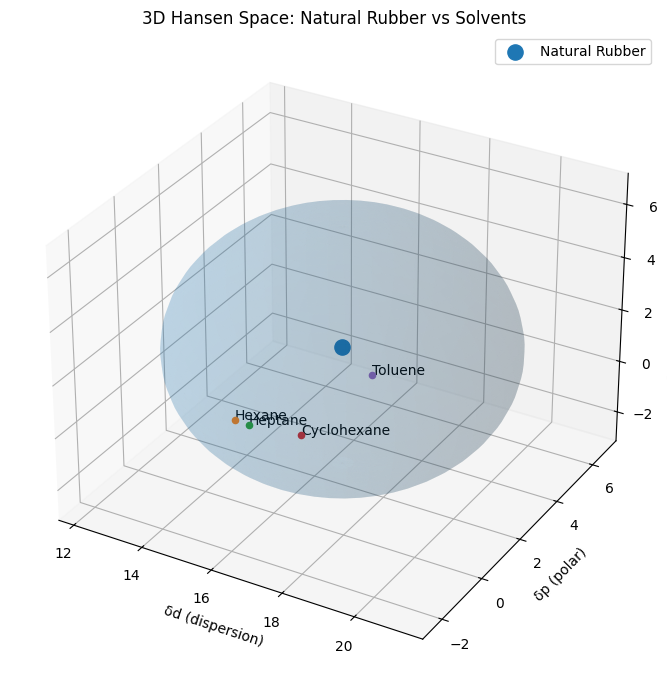

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Hansen parameters (MPa^0.5) ---
polymer = {"name": "Natural Rubber", "dd": 16.7, "dp": 2.2, "dh": 2.0}

solvents = [
    {"name": "Hexane", "dd": 14.9, "dp": 0.0, "dh": 0.0},
    {"name": "Heptane", "dd": 15.3, "dp": 0.0, "dh": 0.0},
    {"name": "Cyclohexane", "dd": 16.8, "dp": 0.0, "dh": 0.2},
    {"name": "Toluene", "dd": 18.0, "dp": 1.4, "dh": 2.0},
]

# Interaction radius (assumed)
R0 = 4.5

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

# --- Polymer point ---
ax.scatter(polymer["dd"], polymer["dp"], polymer["dh"], s=120, label="Natural Rubber")

# --- Solvent points ---
for s in solvents:
    ax.scatter(s["dd"], s["dp"], s["dh"])
    ax.text(s["dd"], s["dp"], s["dh"], s["name"])

# --- Draw Hansen sphere around polymer ---
u = np.linspace(0, 2*np.pi, 50)
v = np.linspace(0, np.pi, 50)

x = polymer["dd"] + R0 * np.outer(np.cos(u), np.sin(v))
y = polymer["dp"] + R0 * np.outer(np.sin(u), np.sin(v))
z = polymer["dh"] + R0 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, alpha=0.15)

# Labels / formatting
ax.set_xlabel("δd (dispersion)")
ax.set_ylabel("δp (polar)")
ax.set_zlabel("δh (hydrogen bonding)")
ax.set_title("3D Hansen Space: Natural Rubber vs Solvents")
ax.legend()

plt.tight_layout()
plt.show()


Top candidate mixtures:
- Hexane:0.8, Heptane:0.2, Cyclohexane:0.0 | Ra=4.55, Score=9.82e+03
- Hexane:0.8, Heptane:0.2, Toluene:0.0 | Ra=4.55, Score=9.82e+03
- Hexane:0.8, Heptane:0.2 | Ra=4.55, Score=9.82e+03
- Hexane:0.7, Heptane:0.3 | Ra=4.49, Score=9.77e+03
- Hexane:0.7, Heptane:0.3, Cyclohexane:0.0 | Ra=4.49, Score=9.77e+03
- Hexane:0.7, Heptane:0.3, Toluene:0.0 | Ra=4.49, Score=9.77e+03
- Hexane:0.9, Heptane:0.1, Cyclohexane:0.0 | Ra=4.61, Score=9.64e+03
- Hexane:0.9, Heptane:0.1, Toluene:0.0 | Ra=4.61, Score=9.64e+03


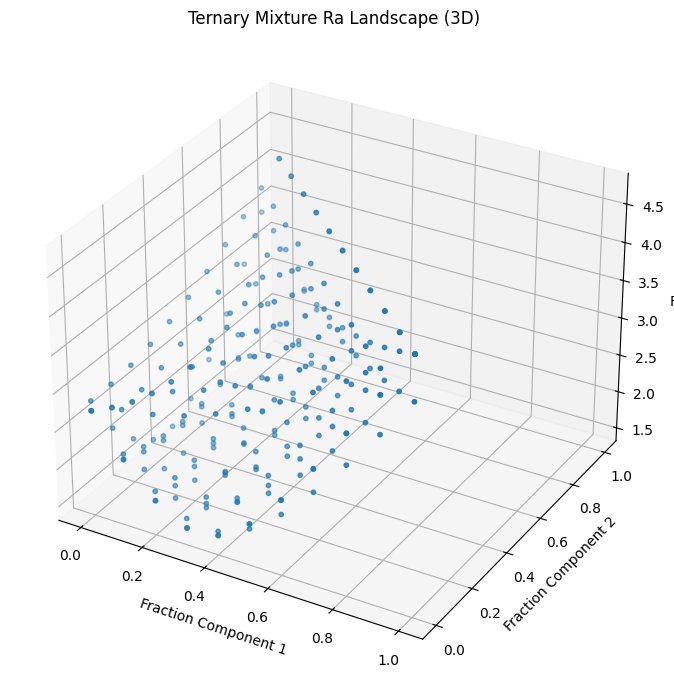

In [ ]:
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Natural Rubber HSP
nr = dict(dd=16.7, dp=2.2, dh=2.0)
R0 = 4.5

# Solvent data
solvents = {
    "Hexane": dict(dd=14.9, dp=0.0, dh=0.0, viscosity=0.00030, radius=0.30),
    "Heptane": dict(dd=15.3, dp=0.0, dh=0.0, viscosity=0.00039, radius=0.33),
    "Cyclohexane": dict(dd=16.8, dp=0.0, dh=0.2, viscosity=0.00096, radius=0.34),
    "Toluene": dict(dd=18.0, dp=1.4, dh=2.0, viscosity=0.00055, radius=0.34)
}

def Ra(polymer, solvent):
    return math.sqrt(
        4*(polymer["dd"]-solvent["dd"])**2 +
        (polymer["dp"]-solvent["dp"])**2 +
        (polymer["dh"]-solvent["dh"])**2
    )

def mixture_HSP(names, fractions):
    dd = dp = dh = visc = radius = 0
    for name, phi in zip(names, fractions):
        s = solvents[name]
        dd += phi * s["dd"]
        dp += phi * s["dp"]
        dh += phi * s["dh"]
        visc += phi * s["viscosity"]
        radius += phi * s["radius"]
    return dict(dd=dd, dp=dp, dh=dh, viscosity=visc, radius=radius)

results = []

# grid step (smaller = more precise, slower)
step = 0.1
phis = np.arange(0, 1 + step, step)

# --- Binary and ternary mixtures ---
for k in range(2, 4):   # 2 and 3 component systems
    for combo in itertools.combinations(solvents.keys(), k):
        if k == 2:
            for p1 in phis:
                p2 = 1-p1
                fracs = [p1, p2]
                m = mixture_HSP(combo, fracs)
                ra = Ra(nr, m)
                diffusion = 1/(m["viscosity"]*m["radius"])
                score = diffusion / (1 + abs(ra - R0))
                results.append((combo, fracs, ra, score, m))
        else:
            for p1 in phis:
                for p2 in phis:
                    if p1 + p2 <= 1:
                        p3 = 1 - (p1 + p2)
                        fracs = [p1, p2, p3]
                        m = mixture_HSP(combo, fracs)
                        ra = Ra(nr, m)
                        diffusion = 1/(m["viscosity"]*m["radius"])
                        score = diffusion / (1 + abs(ra - R0))
                        results.append((combo, fracs, ra, score, m))

# sort by best score
results_sorted = sorted(results, key=lambda x: x[3], reverse=True)

best = results_sorted[:8]
print("Top candidate mixtures:")
for combo, fracs, ra, score, m in best:
    labels = ", ".join([f"{n}:{round(f,2)}" for n,f in zip(combo,fracs)])
    print(f"- {labels} | Ra={ra:.2f}, Score={score:.2e}")

# ---- 3D visualization (composition vs Ra) ----
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

xs = []
ys = []
zs = []

for combo, fracs, ra, score, _ in results:
    if len(combo) == 3:
        xs.append(fracs[0])
        ys.append(fracs[1])
        zs.append(ra)

ax.scatter(xs, ys, zs, s=10)
ax.set_xlabel("Fraction Component 1")
ax.set_ylabel("Fraction Component 2")
ax.set_zlabel("Ra")
ax.set_title("Ternary Mixture Ra Landscape (3D)")
plt.tight_layout()
plt.show()

In [ ]:
import math
import itertools

# -----------------------------
# Natural rubber (approx values)
# -----------------------------
NR = {
    "dd": 16.7,
    "dp": 2.2,
    "dh": 2.0,
    "R0": 8.2
}

# -----------------------------
# Simple solvent library (MPa^0.5)
# -----------------------------
solvents = {
    "hexane":        (14.9, 0.0, 0.0),
    "heptane":       (15.3, 0.0, 0.0),
    "cyclohexane":   (16.8, 0.0, 0.2),
    "toluene":       (18.0, 1.4, 2.0),
    "xylene":        (18.0, 1.0, 3.1),
    "ethyl acetate": (15.8, 5.3, 7.2),
    "acetone":       (15.5, 10.4, 7.0),
    "chloroform":    (17.8, 3.1, 5.7),
    "THF":           (16.8, 5.7, 8.0)
}

# -----------------------------
# Hansen distance
# -----------------------------
def Ra(poly, dd, dp, dh):
    return math.sqrt(
        4*(dd - poly["dd"])**2 +
        (dp - poly["dp"])**2 +
        (dh - poly["dh"])**2
    )

# -----------------------------
# Mix helper (linear mixing)
# -----------------------------
def mix(props, fracs):
    dd = sum(p[0]*f for p,f in zip(props, fracs))
    dp = sum(p[1]*f for p,f in zip(props, fracs))
    dh = sum(p[2]*f for p,f in zip(props, fracs))
    return dd, dp, dh

results = []

# -----------------------------
# 1) Single solvents
# -----------------------------
for name, vals in solvents.items():
    r = Ra(NR, *vals)
    results.append((f"{name}", r))

# -----------------------------
# 2) Binary mixtures
# -----------------------------
for (n1, s1), (n2, s2) in itertools.combinations(solvents.items(), 2):
    for f in [i/10 for i in range(1, 9)]:  # 0.1 → 0.9
        mix_vals = mix([s1, s2], [f, 1-f])
        r = Ra(NR, *mix_vals)
        label = f"{n1}:{n2} ({f:.1f}:{1-f:.1f})"
        results.append((label, r))

# -----------------------------
# 3) Ternary mixtures
# -----------------------------
for (n1,s1), (n2,s2), (n3,s3) in itertools.combinations(solvents.items(), 3):
    for f1 in [0.2, 0.4, 0.6]:
        for f2 in [0.2, 0.4, 0.6]:
            if f1 + f2 < 1.0:
                f3 = 1 - f1 - f2
                mix_vals = mix([s1,s2,s3],[f1,f2,f3])
                r = Ra(NR, *mix_vals)
                label = f"{n1}:{n2}:{n3} ({f1:.2f},{f2:.2f},{f3:.2f})"
                results.append((label, r))

# -----------------------------
# Show best 15 systems
# -----------------------------
best = sorted(results, key=lambda x: x[1])[:15]

print("Best candidates (smallest Ra):\n")
for name, r in best:
    flag = "GOOD" if r < NR["R0"] else "POOR"
    print(f"{name:45s}  Ra = {r:.2f}  ({flag})")



Best candidates (smallest Ra):

cyclohexane:xylene:acetone (0.60,0.20,0.20)    Ra = 0.23  (GOOD)
cyclohexane:toluene:acetone (0.60,0.20,0.20)   Ra = 0.24  (GOOD)
cyclohexane:acetone (0.8:0.2)                  Ra = 0.56  (GOOD)
heptane:toluene:THF (0.40,0.40,0.20)           Ra = 0.64  (GOOD)
hexane:toluene:THF (0.40,0.40,0.20)            Ra = 0.73  (GOOD)
heptane:toluene:acetone (0.40,0.40,0.20)       Ra = 0.74  (GOOD)
cyclohexane:THF (0.7:0.3)                      Ra = 0.76  (GOOD)
heptane:toluene:ethyl acetate (0.40,0.40,0.20)  Ra = 0.77  (GOOD)
cyclohexane:ethyl acetate (0.7:0.3)            Ra = 0.79  (GOOD)
cyclohexane:toluene:acetone (0.40,0.40,0.20)   Ra = 0.83  (GOOD)
cyclohexane:acetone:chloroform (0.60,0.20,0.20)  Ra = 0.83  (GOOD)
hexane:toluene:ethyl acetate (0.20,0.60,0.20)  Ra = 0.85  (GOOD)
cyclohexane:ethyl acetate:chloroform (0.60,0.20,0.20)  Ra = 0.89  (GOOD)
heptane:xylene:acetone (0.40,0.40,0.20)        Ra = 0.90  (GOOD)
cyclohexane:toluene:ethyl acetate (0.60,0.20,0.